# DMN API showcase 

## Intro

This notebook serves as a short showcase of the new DMN API included in the cDMN package.
In a nutshell, it allows users to open a DMN specification by either entering the XML directly or by supplying the path to a .dmn file, after which they can interact with it.

Full documentation for the API will be written soon.

Feel free to play around with the code as much as you like.
Keep in mind that this runs on a Raspberry Pi 0, so it is very slow (it only has one core and 512MB of RAM).

Throughout the notebook we will use the BMI specification as an example.
It is structured as follows:
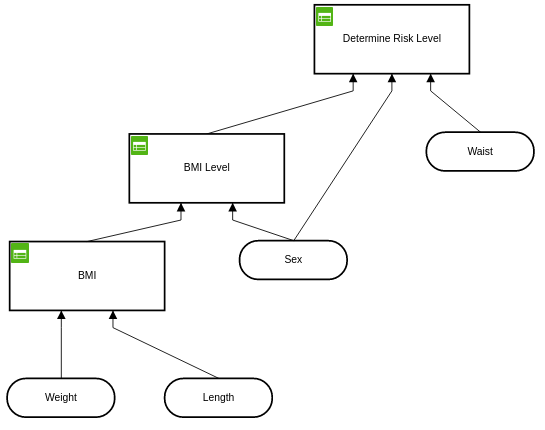
## Code showcase

In [1]:
# Import the API (This might take some time)
from cdmn.API import DMN

# Load the dmn file. This will show some info and warning messages.
spec = DMN(path='./DMN/BMILevel.dmn')

print("Done importing!")

INFO: No function glossary table found.
INFO: No relation glossary table found.
Done importing!


In [2]:
# We can now fetch what inputs and outputs there are:
print("inputs:", spec.get_inputs())
print("outputs:", spec.get_outputs())
print("other:", spec.get_intermediary())

inputs: ['weight', 'sex', 'length', 'waist']
outputs: ['riskLevel']
other: ['bmi', 'BMILevel']


### Viewing information of the DMN specification

We can now use the API to view basic information of the DMN specification.
For example, using the `get_inputs()`, `get_outputs()` and `get_intermediary()` methods will result a list of inputs, outputs and other variables respectively.




In [3]:
# We can now fetch what inputs and outputs there are:
print("inputs:", spec.get_inputs())
print("outputs:", spec.get_outputs())
print("other:", spec.get_intermediary())

inputs: ['weight', 'sex', 'length', 'waist']
outputs: ['riskLevel']
other: ['bmi', 'BMILevel']


The API also allows us to query what dependencies a variable has. For example, if we want to find out what variables need to be set in order to calculate the BMI, we can use the `.dependencies_of` method, as illustrated below.

The method returns every dependency, together with their 'distance' to the variable. This distance is the number of node hops needed in the graph to reach the dependency from the variable.

For example, riskLevel has three direct dependencies: `sex`, `waist` and `BMILevel`.
It is indirectly dependent on bmi (because BMILevel depends  on it), and also indirectly dependent on weight and length (because bmi depends on those).

In [4]:
print('Dependencies of BMI:', spec.dependencies_of('bmi'))

print('Dependencies of riskLevel:\n', spec.dependencies_of('riskLevel'))



Dependencies of BMI: {'weight': 0, 'length': 0}
Dependencies of riskLevel:
 {'BMILevel': 0, 'bmi': 1, 'weight': 2, 'length': 2, 'sex': 0, 'waist': 0}


We can also check what type (`Int`, `Real`, or custom string type) a variable has by using the `type_of` method.
If a variable represents a string, we can also query its list of possible values using the `possible_values_of` method.

In [5]:
if spec.type_of('riskLevel') not in ['Real', 'Int']:
    print('Possible values:', spec.possible_values_of('riskLevel'))

Possible values: Extremely_High, Very_High, Low, High, Increased


### Interacting with the DMN specification

Besides viewing information, we are also able to enter our own data.
Setting the value of a variable can be done using the `set_value` method.

In [6]:
spec.set_value('weight', 74)
spec.set_value('length', 1.79)

After setting values, it makes sense to infer information with them.
Currently, the DMN API allows for two inference tasks:

* `model_expand`: find a set of assignments to the variables that satisfies the DMN specification. Currently, 10 such sets.
* `propagation`: using the information we currently have, find out what values the other variables can still have.

Model expansion is used as shown below.
As you can see, because `weight` and `length` were assigned a value earlier, the `bmi` is always has value `23.09540900720951` and the `riskLevel` is always `Low`. The other variables (`sex`, `BMILevel`, ...) can still differ in values.

In [7]:
print(spec.model_expand().getvalue())


Model 1
weight:={->74}
riskLevel:={->Low}
sex:={->Male}
length:={->1.79}
bmi:={->23.09540900720951}
BMILevel:={->Underweight}

Model 2
weight:={->74}
riskLevel:={->Low}
sex:={->Female}
length:={->1.79}
bmi:={->23.09540900720951}
BMILevel:={->Normal}

Model 3
weight:={->74}
riskLevel:={->Low}
sex:={->Female}
length:={->1.79}
bmi:={->23.09540900720951}
BMILevel:={->Normal}

Model 4
weight:={->74}
riskLevel:={->Low}
sex:={->Female}
length:={->1.79}
bmi:={->23.09540900720951}
BMILevel:={->Normal}

Model 5
weight:={->74}
riskLevel:={->Low}
sex:={->Female}
length:={->1.79}
bmi:={->23.09540900720951}
BMILevel:={->Normal}

Model 6
weight:={->74}
riskLevel:={->Low}
sex:={->Female}
length:={->1.79}
bmi:={->23.09540900720951}
BMILevel:={->Normal}

Model 7
weight:={->74}
riskLevel:={->Low}
sex:={->Female}
length:={->1.79}
bmi:={->23.09540900720951}
BMILevel:={->Normal}

Model 8
weight:={->74}
riskLevel:={->Low}
sex:={->Female}
length:={->1.79}
bmi:={->23.09540900720951}
BMILevel:={->Normal}

Mode

Using the propagation inference, we can confirm that `bmi` and `riskLevel` have a *known* value, whereas the others do not. As mentioned earlier, it will try to find out all possible values for the yet undefined variables. If a variable can only have one value, we are certain of its value.

In [8]:
spec.propagate()

We can use the `is_certain` method to now query whether a variable has a value that is certainly known. We can then use the `value_of` variable to find out what that value is.

For example:

In [9]:
if spec.is_certain('bmi'):
    print('BMI:', spec.value_of('bmi'))
    
if spec.is_certain('riskLevel'):
    print('riskLevel:', spec.value_of('riskLevel'))
    
if spec.is_certain('BMILevel'):
    print('BMILevel:', spec.value_of('BMILevel'))
else:
    print('BMILevel is still unknown.')

BMI: 23.09540900720951
riskLevel: Low
BMILevel is still unknown.


Instead of using `is_certain` on every possible variable, we can easily find out all unknown variables using the `get_unknown_variables` method

In [10]:
print(spec.get_unknown_variables())

['sex', 'BMILevel', 'waist']


### Autopropagate

It is also possible to have the system automatically propagate new values everytime a new value is entered by setting the `auto_propagate` flag when creating a specification.

In [11]:
spec = DMN(path='./DMN/BMILevel.dmn', auto_propagate=True)

INFO: No function glossary table found.
INFO: No relation glossary table found.


This way, it becomes possible to immediatly set values without having to manually run the propagation inference task.

In [12]:
spec.set_value('weight', 74)
spec.set_value('length', 1.79)
if spec.is_certain('bmi'):
    print('Your BMI:', spec.value_of('bmi'))

Your BMI: 23.09540900720951


### Multidirectionality

A feature of this DMN API is that it has no sense of directionality.
I.e., it is not necessary to use the DMN specification from inputs to outputs, but it is also possible to have a more flexible approach.
In the following example, we calculate the `bmi` and `riskLevel` like in the previous examples. However, if the value of `bmi` is too high (greater than 25), then we also calculate what weight someone should have in order to be healthy again. In other words, we calculate the weight 'backwards'.

In [13]:
spec.clear()  # clears all the previously set values

spec.set_value('weight', 97)
spec.set_value('length', 1.79)
print("Your bmi is:", spec.value_of('bmi'))

if spec.is_certain('bmi') and float(spec.value_of('bmi')) > 25:
    print('Your BMI is too high!')
    # Get current weight.
    cur_weight = spec.value_of('weight')
    
    # Calculate ideal weight.
    spec.set_value('weight', None)
    spec.set_value('bmi', 25)
    ideal_weight = float(spec.value_of('weight'))
    print("For a healthy bmi, you should weigh {} kg.".format(ideal_weight))
    print("This is a difference of {} kg.".format(round(cur_weight - ideal_weight, 2)))

Your bmi is: 30.273711806747606
Your BMI is too high!
For a healthy bmi, you should weigh 80.1025 kg.
This is a difference of 16.9 kg.


### A more advanced application

The previous example was already a nice example of a simple application.
The following example will show off a 'bot' to calculate a variable that you request.

It works by first asking what variable you would like to calculate, after which it generates the list of variables that need to have a value set.
For this example, we will be using the DMN specification in a bottom-to-top approach (so we will always start with calculating inputs).

**Try it out yourself!**

In [14]:
spec.clear()
variables = spec.get_outputs() + spec.get_intermediary()  # We won't be calculating inputs
requested_variable = input('Which variable would you like to calculate? {}\n>'.format(variables))

# Generate the list of missing input variables needed to calculate the requested variable.
missing_variables = [x for x in spec.dependencies_of(requested_variable)
                     if x in spec.get_inputs()
                     and x in spec.get_unknown_variables()]
print("\nThe following variables are still unknown:")
print(missing_variables)

for var in missing_variables:
    # Ask for the variable's value. Based on var type, ask different question.
    var_type = spec.type_of(var)
    if var_type in ['Real', 'Int']:
        msg = "Value for {} ({}) unknown.\nSet value as:\n>".format(var, spec.type_of(var))
    else:
        msg = "Value for {} unknown.\nPossible values: [{}]\n>".format(var, spec.possible_values_of(var))
    value = input(msg)
    spec.set_value(var, value)
    
print('Calculated value for {}:\n{}'.format(requested_variable, spec.value_of(requested_variable)))

Which variable would you like to calculate? ['riskLevel', 'bmi', 'BMILevel']
>riskLevel

The following variables are still unknown:
['weight', 'length', 'sex', 'waist']
Value for weight (Real) unknown.
Set value as:
>79
Value for length (Real) unknown.
Set value as:
>1.79
Value for sex unknown.
Possible values: [Female, Male]
>Male
Value for waist (Real) unknown.
Set value as:
>80
Calculated value for riskLevel:
Low
